In [14]:
# Use google colab to run this notebook
! pip install -q kaggle

In [15]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [16]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          36450       1016  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5526        147  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7356        155  1.0              
mohithsairamreddy/salary-data 

In [19]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
! unzip /content/brain-mri-images-for-brain-tumor-detection.zip -d Brain_Tumor_Dataset

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/1 no.jpeg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/10 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/11 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/12 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/13 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/14 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/15 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/17 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/18 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/19 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/2 no.jpeg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/20 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_dataset/no/21 no.jpg  
  inflating: Brain_Tumor_Dataset/brain_tumor_datas

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Set the paths to your training and validation datasets
train_data_dir = '/content/Brain_Tumor_Dataset/Train'
valid_data_dir = '/content/Brain_Tumor_Dataset/Validation'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generate batches of training and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [45]:

# Create the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout regularization in our case we're dropping 20% of our neurons
model.add(Dense(1, activation='sigmoid'))


In [49]:
# Define a callback to stop training at 90% accuracy
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.90:
            print("\nReached 90% accuracy. Stopping training.")
            self.model.stop_training = True

In [50]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the defined callbacks
epochs = 20
callbacks = [Callback()]
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,  # Increase the number of epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size,
    callbacks=callbacks
)

# Save the trained model
model.save('brain_tumor_model.h5')
print("Model saved succesfuly")

Epoch 1/20
7/7 [==============================] - 25s 3s/step - loss: 0.4252 - accuracy: 0.8326 - val_loss: 0.4244 - val_accuracy: 0.7991
Epoch 2/20
7/7 [==============================] - 24s 3s/step - loss: 0.4176 - accuracy: 0.8145 - val_loss: 0.3600 - val_accuracy: 0.8616
Epoch 3/20
7/7 [==============================] - 19s 3s/step - loss: 0.3702 - accuracy: 0.8869 - val_loss: 0.3216 - val_accuracy: 0.8973
Epoch 4/20
7/7 [==============================] - 19s 3s/step - loss: 0.3651 - accuracy: 0.8688 - val_loss: 0.3286 - val_accuracy: 0.8795
Epoch 5/20
7/7 [==============================] - 19s 3s/step - loss: 0.3196 - accuracy: 0.8661 - val_loss: 0.3077 - val_accuracy: 0.8884
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.3229 - accuracy: 0.8750 - val_loss: 0.2987 - val_accuracy: 0.8884
Epoch 7/20
7/7 [==============================] - 19s 3s/step - loss: 0.3676 - accuracy: 0.8416 - val_loss: 0.3110 - val_accuracy: 0.8884
Epoch 8/20
7/7 [==================

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_model.h5')

# Define the class labels
class_labels = ['Benign', 'Malignant']

# Function to preprocess and predict the uploaded image
def predict_image(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize the image to match the input size of the model
    img_rgb = img.convert("RGB")  # Convert the image to RGB
    img_array = np.array(img_rgb) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match the model's input shape
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    class_label = class_labels[predicted_class]
    percentage = np.max(prediction[0]) * 100
    return img, class_label, percentage

# Function to plot the image with the predicted class label and percentage
def plot_image(image, class_label, percentage):
    plt.imshow(image)
    plt.title(f"Predicted class: {class_label} ({percentage:.2f}% confidence)")
    plt.axis('off')
    plt.show()

# Function to handle the image upload and prediction
def handle_upload(image_path):
    img, class_label, percentage = predict_image(image_path)
    plot_image(img, class_label, percentage)

Saving tumor(5).jpg to tumor(5) (1).jpg
1/1 [==============================] - 0s 138ms/step


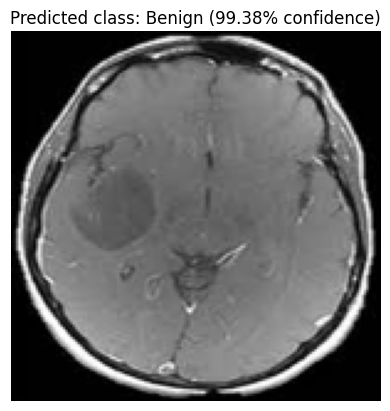

In [53]:
# Upload an image file
from google.colab import files
uploaded_image = files.upload()

# Get the file name and path
image_path = list(uploaded_image.keys())[0]

# Call the handle_upload function to perform prediction and display the results
handle_upload(image_path)

In [51]:
# Plot the accuracy and loss curves
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

plot_metrics(history)